In [151]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [91]:
file_path = 'E:/Copy of Stock Market Tracking.xlsx'

In [92]:
df = pd.read_excel(file_path)
df.head()

,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change
0,TCS,1234544.517475,3374.2,30.43,4045.5,0.165937,2926,0.153178,3334.6,0.011875
1,HUL,616301.326875,2620.6,63.81,2741.6,0.044135,1901.55,0.378139,2590.05,0.011795
2,Airtel,441027.397246,764.6,65.86,860.55,0.111498,628.75,0.216064,756.9,0.010173
3,Bajaj Finance,361172.63514,5977,36.52,8045,0.257054,5220,0.145019,5898.4,0.013326
4,Asian Paints,278960.099566,2912,76.19,3582.9,0.187251,2560,0.1375,2915.95,-0.001355


In [93]:
df.columns

Index(['Stock', 'Market Cap (In Rs Cr.)', 'Current price', 'PE Ratio',
       '52 Week High', '% Below 52 week high', '52 Week Low',
       '% Above 52 Week low', 'Yesterday Closing Price', '% Change'],
      dtype='object')

In [6]:
df.describe()

,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change
count,216,2.160000e+02,215.0,214,216,215.000000,215,214.000000,216.0,215.000000
unique,216,2.160000e+02,215.0,199,215,215.000000,215,214.000000,216.0,215.000000
top,TCS,1.234545e+06,3374.2,,958,0.165937,2926,0.153178,3334.6,0.011875
freq,1,1.000000e+00,1.0,13,2,1.000000,1,1.000000,1.0,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Stock                    216 non-null    object
 1   Market Cap (In Rs Cr.)   216 non-null    object
 2   Current price            215 non-null    object
 3   PE Ratio                 214 non-null    object
 4   52 Week High             216 non-null    object
 5   % Below 52 week high     215 non-null    object
 6   52 Week Low              215 non-null    object
 7   % Above 52 Week low      214 non-null    object
 8   Yesterday Closing Price  216 non-null    object
 9   % Change                 215 non-null    object
dtypes: object(10)
memory usage: 17.0+ KB


In [94]:
#few of the columns contain some missing values so I will use KNN to fill this particular columns
import pandas as pd
from sklearn.impute import KNNImputer

# Convert object columns to numeric since only stock data is actual object type so rest should be change
numeric_columns = df.columns[1:]  # Assuming the first column is the string column

# Handle missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)  # Choose the appropriate number of neighbors

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors="coerce")

    # Perform KNN imputation on the column
    df[column] = imputer.fit_transform(df[[column]])

# Print the updated dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stock                    216 non-null    object 
 1   Market Cap (In Rs Cr.)   216 non-null    float64
 2   Current price            216 non-null    float64
 3   PE Ratio                 216 non-null    float64
 4   52 Week High             216 non-null    float64
 5   % Below 52 week high     216 non-null    float64
 6   52 Week Low              216 non-null    float64
 7   % Above 52 Week low      216 non-null    float64
 8   Yesterday Closing Price  216 non-null    float64
 9   % Change                 216 non-null    float64
dtypes: float64(9), object(1)
memory usage: 17.0+ KB
None


#####  Now Data is fine to work with misisng values gets filled and object data type converted into float type

In [95]:
df.describe()

,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change
count,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,6.658845e+04,2776.779907,52.091493,3459.531395,0.250570,2219.259953,0.248529,2765.392791,0.000568
std,1.641444e+05,7740.654761,77.746102,8753.078173,0.158869,5829.801689,0.223416,7737.269696,0.012881
min,4.048025e+02,20.150000,3.390000,24.750000,0.000804,12.110000,0.001049,19.900000,-0.053166
25%,7.059127e+03,459.237500,23.167500,649.487500,0.127966,396.762500,0.087889,465.562500,-0.006064
50%,2.086164e+04,981.950000,37.985000,1277.875000,0.228039,738.025000,0.203603,954.050000,0.000711
75%,4.774192e+04,2462.725000,58.165000,3420.025000,0.350096,1923.300000,0.324132,2447.412500,0.006968
max,1.620922e+06,89700.000000,918.200000,95954.350000,0.791142,62944.500000,1.134087,89498.350000,0.056706


### Task 1 : Creating a New Sub Sheet & Fetch all the Data from the Sheet called "Data Set" where Data from the PE Ratio is not Blank & PE Ratio < 100 using Query Function  and sort the data by Descending of Market Cap Amount.

In [96]:
new_sheet = df[(df['PE Ratio']!="" ) & (df['PE Ratio']<100)]
new_sheet.sort_values(by = 'PE Ratio', ascending = False)
new_sheet.head()

,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change
0,TCS,1.234545e+06,3374.2,30.43,4045.50,0.165937,2926.00,0.153178,3334.60,0.011875
1,HUL,6.163013e+05,2620.6,63.81,2741.60,0.044135,1901.55,0.378139,2590.05,0.011795
2,Airtel,4.410274e+05,764.6,65.86,860.55,0.111498,628.75,0.216064,756.90,0.010173
3,Bajaj Finance,3.611726e+05,5977.0,36.52,8045.00,0.257054,5220.00,0.145019,5898.40,0.013326
4,Asian Paints,2.789601e+05,2912.0,76.19,3582.90,0.187251,2560.00,0.137500,2915.95,-0.001355


## Task 2 :  Now Creating 2 Columns of Industry & NSE/BSE Code & Fetch Data from the Second Sheet

In [97]:
import pandas as pd

# Read the Excel file
df1 = pd.read_csv('E:/Copy of Stock Market Tracking.csv')
df1.head(10)


,Stock Industry & NSE/BSE Code,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Stock,Industry,NSE/BSE Code
2,TCS,IT,BOM:532540
3,HUL,FMCG,HINDUNILVR
4,Airtel,Telecom,BHARTIARTL
5,Bajaj Finance,NBFC,BAJFINANCE
6,Asian Paints,Paint,ASIANPAINT
7,HCL Tech,IT,HCLTECH
8,Maruti Suzuki,Automobile,MARUTI
9,Avenue Supermart,Retail,DMART


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Stock Industry & NSE/BSE Code  217 non-null    object
 1   Unnamed: 1                     211 non-null    object
 2   Unnamed: 2                     217 non-null    object
dtypes: object(3)
memory usage: 5.3+ KB


In [98]:
#changing the column names
df1.set_axis(['Stock', 'Industry', 'NSE & BSE Code'], axis=1,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_20200\1078493678.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df1.set_axis(['Stock', 'Industry', 'NSE & BSE Code'], axis=1,inplace=True)


In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Stock           217 non-null    object
 1   Industry        211 non-null    object
 2   NSE & BSE Code  217 non-null    object
dtypes: object(3)
memory usage: 5.3+ KB


In [100]:
df1.dropna(inplace= True)

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 1 to 217
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Stock           211 non-null    object
 1   Industry        211 non-null    object
 2   NSE & BSE Code  211 non-null    object
dtypes: object(3)
memory usage: 6.6+ KB


In [102]:
merge_df = pd.merge(df , df1, on='Stock',how='inner')
merge_df.head(10)

,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change,Industry,NSE & BSE Code
0,TCS,1.234545e+06,3374.20,30.430000,4045.50,0.165937,2926.00,0.153178,3334.60,0.011875,IT,BOM:532540
1,HUL,6.163013e+05,2620.60,63.810000,2741.60,0.044135,1901.55,0.378139,2590.05,0.011795,FMCG,HINDUNILVR
2,Airtel,4.410274e+05,764.60,65.860000,860.55,0.111498,628.75,0.216064,756.90,0.010173,Telecom,BHARTIARTL
3,Bajaj Finance,3.611726e+05,5977.00,36.520000,8045.00,0.257054,5220.00,0.145019,5898.40,0.013326,NBFC,BAJFINANCE
4,Asian Paints,2.789601e+05,2912.00,76.190000,3582.90,0.187251,2560.00,0.137500,2915.95,-0.001355,Paint,ASIANPAINT
5,HCL Tech,2.917701e+05,1077.00,52.091493,1359.40,0.207739,877.35,0.227560,1071.65,0.004992,IT,HCLTECH
6,Maruti Suzuki,2.554384e+05,8454.20,42.100000,9769.00,0.134589,6536.55,0.293373,8369.20,0.010156,Automobile,MARUTI
7,Avenue Supermart,2.501579e+05,3855.00,109.050000,4609.00,0.163593,3186.00,0.209981,3911.80,-0.014520,Retail,DMART
8,L&T,3.026172e+05,2153.75,31.530000,2210.50,0.025673,1456.80,0.478412,2160.20,-0.002986,Infrastructure,BOM:500510
9,Bajaj Finserv,2.212925e+05,1391.00,40.480000,3724.20,0.626497,1374.35,0.012115,1387.80,0.002306,Financial Servcies,BAJAJFINSV


In [103]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stock                    210 non-null    object 
 1   Market Cap (In Rs Cr.)   210 non-null    float64
 2   Current price            210 non-null    float64
 3   PE Ratio                 210 non-null    float64
 4   52 Week High             210 non-null    float64
 5   % Below 52 week high     210 non-null    float64
 6   52 Week Low              210 non-null    float64
 7   % Above 52 Week low      210 non-null    float64
 8   Yesterday Closing Price  210 non-null    float64
 9   % Change                 210 non-null    float64
 10  Industry                 210 non-null    object 
 11  NSE & BSE Code           210 non-null    object 
dtypes: float64(9), object(3)
memory usage: 21.3+ KB


#### Task 3 : Now Creating 2 More Columns at the End with the Heading "Bear Mode 1" & "Bear Mode 2"



In [104]:
merge_df['Bear Mode1'] = "Yes"
merge_df['Bear Mode2'] = "yes"

In [105]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stock                    210 non-null    object 
 1   Market Cap (In Rs Cr.)   210 non-null    float64
 2   Current price            210 non-null    float64
 3   PE Ratio                 210 non-null    float64
 4   52 Week High             210 non-null    float64
 5   % Below 52 week high     210 non-null    float64
 6   52 Week Low              210 non-null    float64
 7   % Above 52 Week low      210 non-null    float64
 8   Yesterday Closing Price  210 non-null    float64
 9   % Change                 210 non-null    float64
 10  Industry                 210 non-null    object 
 11  NSE & BSE Code           210 non-null    object 
 12  Bear Mode1               210 non-null    object 
 13  Bear Mode2               210 non-null    object 
dtypes: float64(9), object(5)
m

In [106]:
def bear_market(bear_mode_attribute):
  for i in bear_mode_attribute:
    if i > 30:
      merge_df['Bear Mode1'] = "Yes"
    else:
      merge_df['Bear Mode1'] = "No"
bear_market(merge_df['% Change'])


In [54]:
merge_df.head()

,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change,Industry,NSE & BSE Code,Bear Mode1,Bear Mode2
0,TCS,1.234545e+06,3374.2,30.43,4045.50,0.165937,2926.00,0.153178,3334.60,0.011875,IT,BOM:532540,No,No
1,HUL,6.163013e+05,2620.6,63.81,2741.60,0.044135,1901.55,0.378139,2590.05,0.011795,FMCG,HINDUNILVR,No,No
2,Airtel,4.410274e+05,764.6,65.86,860.55,0.111498,628.75,0.216064,756.90,0.010173,Telecom,BHARTIARTL,No,No
3,Bajaj Finance,3.611726e+05,5977.0,36.52,8045.00,0.257054,5220.00,0.145019,5898.40,0.013326,NBFC,BAJFINANCE,No,No
4,Asian Paints,2.789601e+05,2912.0,76.19,3582.90,0.187251,2560.00,0.137500,2915.95,-0.001355,Paint,ASIANPAINT,No,No


##### Below code clearly shows that there is no bear market for the market

In [107]:
merge_df[merge_df['Bear Mode1'] == 'yes']

,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change,Industry,NSE & BSE Code,Bear Mode1,Bear Mode2


In [108]:
def bear_market(bear_mode_attribute):
  for i in bear_mode_attribute:
    if i > 30:
      merge_df['Bear Mode2'] = "Yes"
    else:
      merge_df['Bear Mode2'] = "No"
bear_market(merge_df['% Change'])


In [109]:
merge_df['Bear Mode2'].describe()

count     210
unique      1
top        No
freq      210
Name: Bear Mode2, dtype: object

Stock Status : Now Create a Column named "Stock Status" & then apply multiple IF Conditions to check if PE Ratio <65, Bear Mode 1 & 2 = "No" then Print "Good Stock" in the column else "".

In [110]:
#first creating a Stock Status column

merge_df['Stock Status'] = " "
for i in range(len(merge_df)):
    if merge_df['PE Ratio'][i] <65 and merge_df['Bear Mode1'][i] !='Yes' and merge_df['Bear Mode2'][i] !='Yes' :
        merge_df['Stock Status'] = 'Good Stock'
    

In [111]:
merge_df[merge_df['Stock Status']=='Good Stock']

,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change,Industry,NSE & BSE Code,Bear Mode1,Bear Mode2,Stock Status
0,TCS,1.234545e+06,3374.2,30.43,4045.50,0.165937,2926.00,0.153178,3334.60,0.011875,IT,BOM:532540,No,No,Good Stock
1,HUL,6.163013e+05,2620.6,63.81,2741.60,0.044135,1901.55,0.378139,2590.05,0.011795,FMCG,HINDUNILVR,No,No,Good Stock
2,Airtel,4.410274e+05,764.6,65.86,860.55,0.111498,628.75,0.216064,756.90,0.010173,Telecom,BHARTIARTL,No,No,Good Stock
3,Bajaj Finance,3.611726e+05,5977.0,36.52,8045.00,0.257054,5220.00,0.145019,5898.40,0.013326,NBFC,BAJFINANCE,No,No,Good Stock
4,Asian Paints,2.789601e+05,2912.0,76.19,3582.90,0.187251,2560.00,0.137500,2915.95,-0.001355,Paint,ASIANPAINT,No,No,Good Stock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Aarti Industries,2.108142e+04,581.8,17.20,1118.00,0.479606,579.00,0.004836,592.40,-0.017893,Chemical,AARTIIND,No,No,Good Stock
206,Subex,1.992012e+03,36.2,593.93,54.50,0.335780,18.70,0.935829,36.05,0.004161,Technology,BOM:532348,No,No,Good Stock
207,Crisil,2.216690e+04,3020.0,38.36,3863.55,0.218335,2540.00,0.188976,3044.50,-0.008047,Reserach,CRISIL,No,No,Good Stock
208,Lux Industries,4.564430e+03,1524.7,17.12,3925.00,0.611541,1515.10,0.006336,1526.65,-0.001277,Textile,BOM:539542,No,No,Good Stock


In [112]:
for i in range(len(merge_df)):
    if merge_df['PE Ratio'][i] <65 and merge_df['Bear Mode1'][i] =='NO' and merge_df['Bear Mode2'][i] =='No' :
        print('yes')

Now find out the Highest value of the Market Cap & then categorize 60% and Above of the Highest Value as Large Cap Stocks, 40-60% as Medium Cap Stocks & 0-40% as Low Cap Stocks in a new Column at last naming it as Cap Size.

In [123]:
#ading the new column in the data as cap_size
merge_df['cap_size'] = ' '
highest_market_value = max(merge_df['Market Cap (In Rs Cr.)'])
for num in range(len(merge_df)):
	if merge_df['Market Cap (In Rs Cr.)'][i] >= (0.6 * highest_market_value):
        merge_df['cap_size'][i] = "Large Cap" 
	elif merge_df['Market Cap (In Rs Cr.)'][i] < (0.6 * highest_market_value) and merge_df['Market Cap (In Rs Cr.)'][i] >= (0.4 * highest_market_value) :
        merge_df['cap_size'] = "Medium Cap"
	else:
        merge_df['Market Cap (In Rs Cr.)'] = "Small cap"
        |
        
        

TabError: inconsistent use of tabs and spaces in indentation (2115819496.py, line 6)

In [116]:
def get_cap_size(merge_df, highest_market_value):
  merge_df['cap_size'] = ' '
  for i in range(len(merge_df)):
    if merge_df['Market Cap (In Rs Cr.)'][i] >= (0.6 * highest_market_value):
      merge_df.loc[i, 'cap_size'] = 'Large Cap'
    elif merge_df['Market Cap (In Rs Cr.)'][i] < (0.6 * highest_market_value) and merge_df['Market Cap (In Rs Cr.)'][i] >= (0.4 * highest_market_value):
      merge_df.loc[i, 'cap_size'] = 'Medium Cap'
    else:
      merge_df.loc[i, 'cap_size'] = 'Small Cap'
  return merge_df

highest_market_value = max(merge_df['Market Cap (In Rs Cr.)'])
merge_df = get_cap_size(merge_df, highest_market_value)
merge_df.head(10)


,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change,Industry,NSE & BSE Code,Bear Mode1,Bear Mode2,Stock Status,cap_size
0,TCS,1.234545e+06,3374.20,30.430000,4045.50,0.165937,2926.00,0.153178,3334.60,0.011875,IT,BOM:532540,No,No,Good Stock,Large Cap
1,HUL,6.163013e+05,2620.60,63.810000,2741.60,0.044135,1901.55,0.378139,2590.05,0.011795,FMCG,HINDUNILVR,No,No,Good Stock,Small Cap
2,Airtel,4.410274e+05,764.60,65.860000,860.55,0.111498,628.75,0.216064,756.90,0.010173,Telecom,BHARTIARTL,No,No,Good Stock,Small Cap
3,Bajaj Finance,3.611726e+05,5977.00,36.520000,8045.00,0.257054,5220.00,0.145019,5898.40,0.013326,NBFC,BAJFINANCE,No,No,Good Stock,Small Cap
4,Asian Paints,2.789601e+05,2912.00,76.190000,3582.90,0.187251,2560.00,0.137500,2915.95,-0.001355,Paint,ASIANPAINT,No,No,Good Stock,Small Cap
5,HCL Tech,2.917701e+05,1077.00,52.091493,1359.40,0.207739,877.35,0.227560,1071.65,0.004992,IT,HCLTECH,No,No,Good Stock,Small Cap
6,Maruti Suzuki,2.554384e+05,8454.20,42.100000,9769.00,0.134589,6536.55,0.293373,8369.20,0.010156,Automobile,MARUTI,No,No,Good Stock,Small Cap
7,Avenue Supermart,2.501579e+05,3855.00,109.050000,4609.00,0.163593,3186.00,0.209981,3911.80,-0.014520,Retail,DMART,No,No,Good Stock,Small Cap
8,L&T,3.026172e+05,2153.75,31.530000,2210.50,0.025673,1456.80,0.478412,2160.20,-0.002986,Infrastructure,BOM:500510,No,No,Good Stock,Small Cap
9,Bajaj Finserv,2.212925e+05,1391.00,40.480000,3724.20,0.626497,1374.35,0.012115,1387.80,0.002306,Financial Servcies,BAJAJFINSV,No,No,Good Stock,Small Cap


In [120]:
#showing only large cap
merge_df[merge_df['cap_size']=='Large Cap']


,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change,Industry,NSE & BSE Code,Bear Mode1,Bear Mode2,Stock Status,cap_size
0,TCS,1.234545e+06,3374.2,30.43,4045.50,0.165937,2926.0,0.153178,3334.6,0.011875,IT,BOM:532540,No,No,Good Stock,Large Cap
169,Reliance,1.620922e+06,2467.9,25.09,2856.15,0.135935,2180.0,0.132064,2471.6,-0.001497,Telecom and oil,RELIANCE,No,No,Good Stock,Large Cap


In [136]:
merge_df[(merge_df.cap_size)=='Medium Cap' ]

,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change,Industry,NSE & BSE Code,Bear Mode1,Bear Mode2,Stock Status,cap_size


In [137]:
0.6 * highest_market_value

972553.46346006

In [139]:
merge_df[merge_df['Market Cap (In Rs Cr.)'] > 972553]

,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change,Industry,NSE & BSE Code,Bear Mode1,Bear Mode2,Stock Status,cap_size
0,TCS,1.234545e+06,3374.2,30.43,4045.50,0.165937,2926.0,0.153178,3334.6,0.011875,IT,BOM:532540,No,No,Good Stock,Large Cap
169,Reliance,1.620922e+06,2467.9,25.09,2856.15,0.135935,2180.0,0.132064,2471.6,-0.001497,Telecom and oil,RELIANCE,No,No,Good Stock,Large Cap


In [144]:
Processed_data = merge_df[merge_df['Stock Status']=='Good Stock']

In [146]:
Processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stock                    210 non-null    object 
 1   Market Cap (In Rs Cr.)   210 non-null    float64
 2   Current price            210 non-null    float64
 3   PE Ratio                 210 non-null    float64
 4   52 Week High             210 non-null    float64
 5   % Below 52 week high     210 non-null    float64
 6   52 Week Low              210 non-null    float64
 7   % Above 52 Week low      210 non-null    float64
 8   Yesterday Closing Price  210 non-null    float64
 9   % Change                 210 non-null    float64
 10  Industry                 210 non-null    object 
 11  NSE & BSE Code           210 non-null    object 
 12  Bear Mode1               210 non-null    object 
 13  Bear Mode2               210 non-null    object 
 14  Stock Status             2

In [150]:
Processed_data.to_csv("Processed Stock market data.csv")

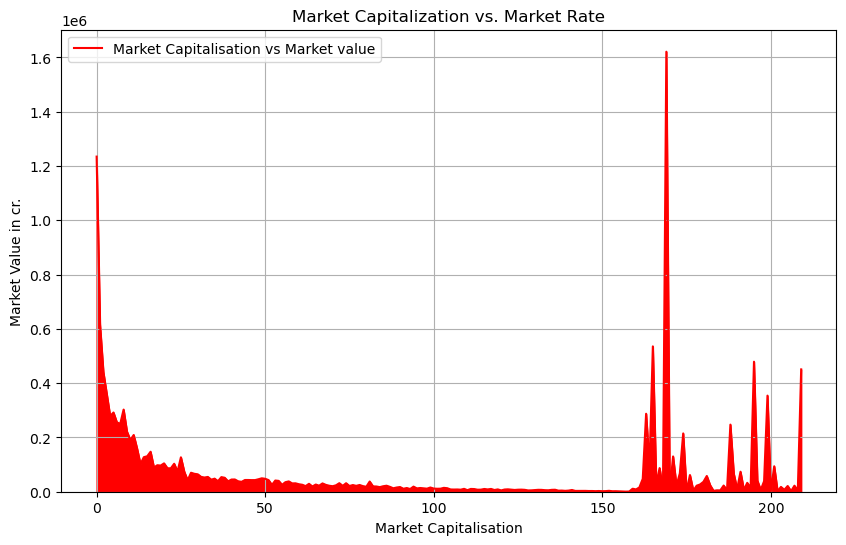

In [187]:
merge_df['Market Cap (In Rs Cr.)'].plot(kind="area", color= 'r', grid= "True")
plt.xlabel("Market Capitalisation")
plt.ylabel("Market Value in cr.")
plt.rcParams['figure.figsize'] = (10, 6)
plt.title("Market Capitalization vs. Market Rate")
plt.legend(["Market Capitalisation vs Market value"])
plt.show()

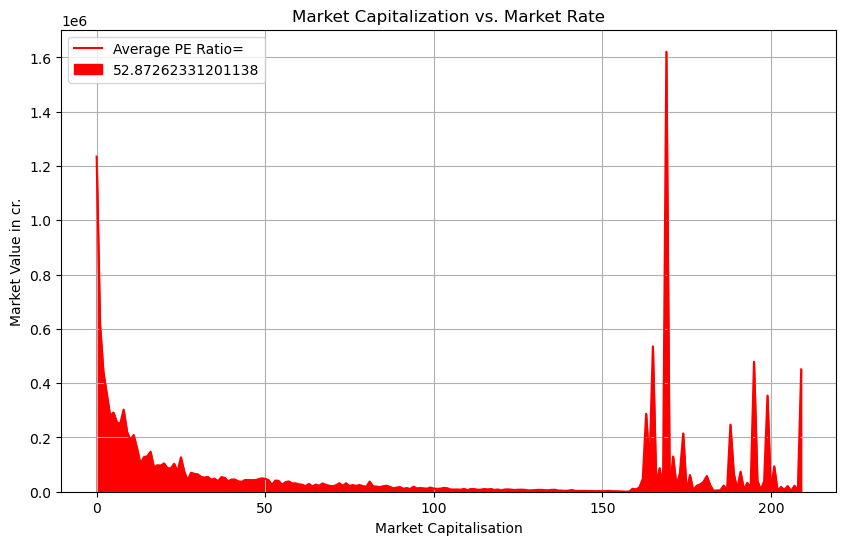

In [203]:
#What is the average PE ratio for the stocks in the dataset? This will give us an idea of how expensive the stocks in the dataset are.
merge_df['Market Cap (In Rs Cr.)'].plot(kind="area", color= 'r', grid= "True")
plt.xlabel("Market Capitalisation")
plt.ylabel("Market Value in cr.")
plt.rcParams['figure.figsize'] = (10, 6)
plt.title("Market Capitalization vs. Market Rate")
plt.legend(["Average PE Ratio=",str(np.mean(merge_df['PE Ratio']))])
plt.show()

In [206]:
#What is the correlation between market capitalization and current price? This will tell us whether there is a relationship between the size
#of a company and its stock price.

np.corrcoef(merge_df['Market Cap (In Rs Cr.)'] , merge_df['Current price'])

array([[1.        , 0.01683598],
       [0.01683598, 1.        ]])